In [2]:
queries = []

filenames_1 = [
             "New_Approach_1.py",
             "new_train_sequence_1.py",
             "new_base_learner.py",
             "new_help_functions.py",
]



filenames_2 = [
               "New_Algorithmic_Approach.py",
               "New_Prediction_Pipeline.py"
]

filenames_3 = [
              "Similar_Word_Scraper.py",
              "Embed_Generator.py"
]

for fn in filenames_1:
  queries.append(f"https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/{fn}")

for fn in filenames_2:
  queries.append(f"https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Algorithmic_Approach/{fn}")

for fn in filenames_3:
  queries.append(f"https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/word_generation/{fn}")


In [3]:
queries

['https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/New_Approach_1.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/new_train_sequence_1.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/new_base_learner.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/new_help_functions.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Algorithmic_Approach/New_Algorithmic_Approach.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Algorithmic_Approach/New_Prediction_Pipeline.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/word_generation/Similar_Word_Scraper.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/word_generation/Embed_Generator.py']

In [4]:
import subprocess
# Download and import my module files from GitHub
result = subprocess.run(["wget", "--no-cache", "--backups=1"] + queries, stderr=subprocess.PIPE, stdout=subprocess.PIPE)
print(result.stderr.decode("utf-8"))

--2022-05-02 04:06:05--  https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/New_Approach_1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3796 (3.7K) [text/plain]
Failed to rename New_Approach_1.py to New_Approach_1.py.1: (2) No such file or directory
Saving to: ‘New_Approach_1.py’

     0K ...                                                   100% 25.0M=0s

2022-05-02 04:06:05 (25.0 MB/s) - ‘New_Approach_1.py’ saved [3796/3796]

--2022-05-02 04:06:05--  https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/new_train_sequence_1.py
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 7100 (6.9K) [text/plain]
Failed to rename new_train_sequence_

In [5]:
!wget --no-cache --backups=1 https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/salary_params.json

--2022-05-02 04:06:06--  https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/salary_params.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 898 [text/plain]
Failed to rename salary_params.json to salary_params.json.1: (2) No such file or directory
Saving to: ‘salary_params.json’

salary_params.json  100%[===================>]     898  --.-KB/s    in 0s      

2022-05-02 04:06:06 (54.1 MB/s) - ‘salary_params.json’ saved [898/898]



In [6]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [1]:
import json

with open("salary_params.json", "r") as salary_params_json:
  params = json.load(salary_params_json)

In [2]:
params

{'BASE_LAYERS': 0,
 'BASE_NEURONS': 64,
 'BATCH_SIZE': 1,
 'DATA_CYCLES': 20,
 'DATA_PATH': '/content/gdrive/MyDrive/Senior_Project_Stuff/dataset_specific_tries/salary_prediction/salary_clean.csv',
 'D_FF': 512,
 'D_MODEL': 300,
 'EMBED_PATH': '/content/gdrive/MyDrive/Senior_Project_Stuff/dataset_specific_tries/salary_prediction/salary_embedding_matrix.npy',
 'EPOCHS': 600,
 'EPOCH_SAVE_LIST': [99, 199, 299, 399, 499, 599],
 'FEATURE_SIZE': 9,
 'HEADS': 10,
 'HIDDEN_SIZE': 512,
 'LEARNER_EPOCHS': 1,
 'LEARNER_STEPS': 16,
 'META_EPOCHS': 16,
 'META_STEPS': 16,
 'MODEL_SAVE_PATH': 'TODO',
 'NUM_CLASSES': 1,
 'NUM_SIMILAR_WORDS': 5,
 'QUERY_SIZE': 30,
 'SEQUENCE_LENGTH': 1,
 'STARTING_EPOCH': 0,
 'STARTING_VOCAB': 'salary',
 'VERBOSE': 1,
 'VOCAB_DEPTH': 4,
 'VOCAB_PATH': '/content/gdrive/MyDrive/Senior_Project_Stuff/dataset_specific_tries/salary_prediction/salary_centered_words.json'}

In [3]:
from Embed_Generator import *
from Similar_Word_Scraper import *

In [4]:
import pandas as pd

data = pd.read_csv(params["DATA_PATH"])

In [5]:
data.head()

,age,salary,relationship not in family,relationship husband,relationship wife,relationship own child,relationship unmarried,relationship other relative,race white,race black,race asian pacific islander,race american indian eskimo,race other,sex male,sex female,education,work hours,work class
0,39,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13,40,6
1,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13,13,2
2,38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,40,4
3,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,40,4
4,28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13,40,4


In [6]:
feature_words = []

for i in data.columns:
  feature_words.extend(i.lower().split(" "))

In [7]:
feature_words_set = list(set(feature_words))

In [8]:
feature_words_set

['relationship',
 'other',
 'not',
 'eskimo',
 'education',
 'pacific',
 'relative',
 'white',
 'class',
 'unmarried',
 'female',
 'race',
 'work',
 'in',
 'husband',
 'wife',
 'islander',
 'age',
 'indian',
 'own',
 'american',
 'asian',
 'hours',
 'family',
 'child',
 'salary',
 'black',
 'sex',
 'male']

In [9]:
Similar_Word_Scraper.initialize_nltk()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
word_scraper = Similar_Word_Scraper(feature_words_set, params["VOCAB_DEPTH"])


In [11]:
word_set = word_scraper()

0


100%|██████████| 29/29 [00:04<00:00,  6.23it/s]


Length of new queue: 456
1


100%|██████████| 456/456 [00:08<00:00, 55.45it/s]


Length of new queue: 2882
2


100%|██████████| 2882/2882 [00:34<00:00, 83.08it/s]


Length of new queue: 5562
3


100%|██████████| 5562/5562 [01:53<00:00, 48.99it/s]

Length of new queue: 4350


In [13]:
with open(params["VOCAB_PATH"], "w") as vocab_json:
  json.dump(word_set, vocab_json)

In [14]:
!python3 -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.1 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051301 sha256=b45911aee2264f68a64679f069584ef36c1c336fe8f62b72a8e0a588db7ca340
  Stored in directory: /tmp/pip-ephem-wheel-cache-3_ku5kl7/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


## Restart Runtime here

In [1]:
import json
with open("salary_params.json", "r") as params_json:
  params = json.load(params_json)

In [2]:
with open(params["VOCAB_PATH"], "r") as vocab_json:
  vocab = json.load(vocab_json)

In [7]:
with open(params["VOCAB_PATH"], "w") as vocab_json_write:
  json.dump([i[0] for i in vocab], vocab_json_write)

In [3]:
from Embed_Generator import *


In [8]:
embed_generator = Embed_Generator([i[0] for i in vocab])

In [9]:
np_embeds = embed_generator.call()

In [10]:
np_embeds.shape

(8929, 300)

In [11]:
import numpy as np
with open(params["EMBED_PATH"], "wb") as f:
  np.save(f, np_embeds)

# Train Sequence

In [1]:
from new_train_sequence_1 import *

In [3]:
part_a_interpreter, algo, logs = train_sequence("salary_params.json", dataset_name = "salary")

On Epoch 0
Epoch 0, Step 0: 0.480, Most Similar Words: ['world' 'race' 'people' 'way' 'thing'], Target Word: age
Cosine Similarity between most similar word and target embedding: [0.40732697 0.3022575  0.4477591  0.3474198  0.35249546]


Epoch 0, Step 1: 0.749, Most Similar Words: ['cetus' 'projectiles' 'threshes' 'hew' 'launchers'], Target Word: salary
Cosine Similarity between most similar word and target embedding: [-0.06999454 -0.07133894 -0.07210541 -0.07210541 -0.04432899]


Epoch 0, Step 2: 0.622, Most Similar Words: ['coordinated' 'gratitude' 'coordination' 'founder' 'pioneer'], Target Word: relationship not in family
Cosine Similarity between most similar word and target embedding: [0.26828212 0.3690871  0.27935115 0.25788203 0.25788203]


Epoch 0, Step 3: 0.774, Most Similar Words: ['coordinations' 'libido' 'remus' 'suffuse' 'denseness'], Target Word: relationship husband
Cosine Similarity between most similar word and target embedding: [-0.08741483  0.28266895  0.09973559 -0

## Visualize Results

In [4]:
import pandas as pd

In [6]:
df = pd.DataFrame(logs)

In [7]:
df.head()

,learner_mae,meta_mae,learner_weight_magnitude,learner_bias_magnitude,guess_cos_sim
0,0.496557,"tf.Tensor(0.48010647, shape=(), dtype=float32)",0.287785,[-0.008846698],"(tf.Tensor(0.40732697, shape=(), dtype=float32..."
1,0.471610,"tf.Tensor(0.7485321, shape=(), dtype=float32)",0.245199,[0.008858919],"(tf.Tensor(-0.06999454, shape=(), dtype=float3..."
2,0.618093,"tf.Tensor(0.6224692, shape=(), dtype=float32)",0.317991,[0.013606692],"(tf.Tensor(0.26828212, shape=(), dtype=float32..."
3,0.907584,"tf.Tensor(0.7741034, shape=(), dtype=float32)",0.267434,[0.014960224],"(tf.Tensor(-0.08741483, shape=(), dtype=float3..."
4,0.499630,"tf.Tensor(0.41746354, shape=(), dtype=float32)",0.280390,[-0.00048190524],"(tf.Tensor(0.42351758, shape=(), dtype=float32..."


In [8]:
df["meta_mae_numpy"] = [a.numpy() for a in df["meta_mae"]]
df.drop("meta_mae", axis = 1, inplace = True)
df["learner_bias_magnitude_1"] = [a[0] for a in df["learner_bias_magnitude"]]
df["step"] = df.index
df["guess_cos_sim_np"] = [a.numpy() for a in df["guess_cos_sim"]]
df["guess_cos_sim_max"] = [max(a) for a in df["guess_cos_sim_np"]]
for i in range(df["guess_cos_sim_np"].iloc[0].shape[0]):
  df[f"guess_cos_sim_{i}"] = [a[i] for a in df["guess_cos_sim_np"]]
  
df.head()

,learner_mae,learner_weight_magnitude,learner_bias_magnitude,guess_cos_sim,meta_mae_numpy,learner_bias_magnitude_1,step,guess_cos_sim_np,guess_cos_sim_max,guess_cos_sim_0,guess_cos_sim_1,guess_cos_sim_2,guess_cos_sim_3,guess_cos_sim_4
0,0.496557,0.287785,[-0.008846698],"(tf.Tensor(0.40732697, shape=(), dtype=float32...",0.480106,-0.008847,0,"[0.40732697, 0.3022575, 0.4477591, 0.3474198, ...",0.447759,0.407327,0.302258,0.447759,0.347420,0.352495
1,0.471610,0.245199,[0.008858919],"(tf.Tensor(-0.06999454, shape=(), dtype=float3...",0.748532,0.008859,1,"[-0.06999454, -0.071338944, -0.07210541, -0.07...",-0.044329,-0.069995,-0.071339,-0.072105,-0.072105,-0.044329
2,0.618093,0.317991,[0.013606692],"(tf.Tensor(0.26828212, shape=(), dtype=float32...",0.622469,0.013607,2,"[0.26828212, 0.3690871, 0.27935115, 0.25788203...",0.369087,0.268282,0.369087,0.279351,0.257882,0.257882
3,0.907584,0.267434,[0.014960224],"(tf.Tensor(-0.08741483, shape=(), dtype=float3...",0.774103,0.014960,3,"[-0.08741483, 0.28266895, 0.09973559, -0.08741...",0.282669,-0.087415,0.282669,0.099736,-0.087415,-0.087415
4,0.499630,0.280390,[-0.00048190524],"(tf.Tensor(0.42351758, shape=(), dtype=float32...",0.417464,-0.000482,4,"[0.42351758, 0.2998365, 0.40185356, 0.41141966...",0.423518,0.423518,0.299836,0.401854,0.411420,0.364098


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

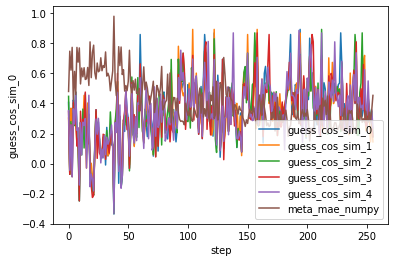

In [10]:
# sns.lineplot(data = df, x = "step", y = "learner_mae", label = "learner_mae")
for i in range(df["guess_cos_sim_np"].iloc[0].shape[0]):
  sns.lineplot(data = df, x = "step", y = f"guess_cos_sim_{i}", label = f"guess_cos_sim_{i}")
sns.lineplot(data = df, x = "step", y = "meta_mae_numpy", label = "meta_mae_numpy")
plt.legend()
# plt.ylim(0,.75)

In [11]:
df["learner_bias_magnitude_2"] = np.abs(df["learner_bias_magnitude_1"])
df["guess_cos_sim_sum"] = [sum(a) for a in df["guess_cos_sim_np"]]

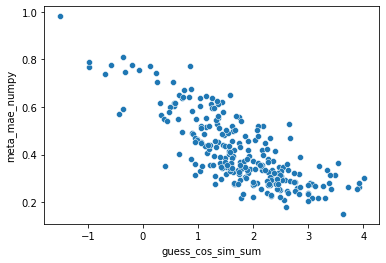

In [12]:
sns.scatterplot(data = df, x = "guess_cos_sim_sum", y = "meta_mae_numpy")

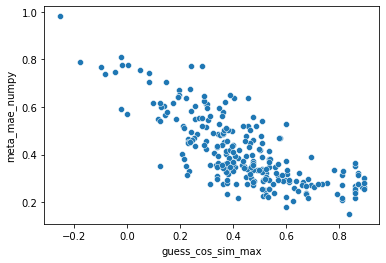

In [13]:
sns.scatterplot(data = df, x = "guess_cos_sim_max", y = "meta_mae_numpy")


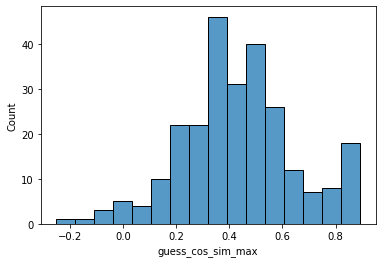

In [14]:
sns.histplot(data = df, x = "guess_cos_sim_max")

## Test Interpreter

In [15]:
from New_Prediction_Pipeline import *

In [16]:
full_results_dict = {}
number_of_neurons_in_base_model = 32

In [17]:
import numpy as np
import json
from new_train_sequence_1 import tf
from new_help_functions import *
with open("salary_params.json", "r") as params_json:
  params = json.load(params_json)

vocab, embed_mat, vocab_to_number = load_embed_and_dictionary(params["VOCAB_PATH"], params["EMBED_PATH"])

dataset_generator = load_dataset_generator(params["DATA_PATH"], dataset_name = "salary")

metrics = {"MeanAbsoluteError": tf.keras.metrics.MeanAbsoluteError()}

for train_test_batch, target_col in dataset_generator:

  batch = train_test_batch
  X_train, X_test, y_train, y_test = train_test_batch
  if y_train.name in full_results_dict.keys():
    break
  print(y_train.name)
  base_model = tf.keras.models.Sequential([
                                         tf.keras.layers.Dense(number_of_neurons_in_base_model, activation = "relu"),
                                         tf.keras.layers.Dense(1, activation = "linear")
  ])

  base_model.compile(
      loss = "mse",
      optimizer = "adam",
      metrics = ["mae"]
  )
  feature_embeds = np.array([average_embed(w, embed_mat, vocab_to_number) for w in batch[0].columns]).reshape(1, batch[0].shape[1], -1)
  interp_callback_training = Train_Pipeline(base_model, part_a_interpreter, algo, -1, feature_embeds, number_of_neurons_in_base_model, tf.keras.losses.MeanSquaredError(), tf.keras.optimizers.Adam(), target_col, metrics)
  interp_callback_training.fit(X_train, y_train, params["BATCH_SIZE"], 10, 16)
  final_preds = []
  for i in interp_callback_training.interpreter_callback.interpreter_output_words:
    final_preds.append(i[-1])
  full_results_dict[y_train.name] = final_preds

age
On Epoch 0


  6%|▋         | 1/16 [00:00<00:01,  7.63it/s]

MeanAbsoluteError: 0.19
MeanAbsoluteError: 0.10


 19%|█▉        | 3/16 [00:00<00:00, 13.85it/s]

MeanAbsoluteError: 0.10
MeanAbsoluteError: 0.10


 31%|███▏      | 5/16 [00:00<00:00, 14.74it/s]

MeanAbsoluteError: 0.08
MeanAbsoluteError: 0.07
MeanAbsoluteError: 0.06


 56%|█████▋    | 9/16 [00:00<00:00, 23.47it/s]

MeanAbsoluteError: 0.06
MeanAbsoluteError: 0.08
MeanAbsoluteError: 0.11
MeanAbsoluteError: 0.11
MeanAbsoluteError: 0.13
MeanAbsoluteError: 0.13


100%|██████████| 16/16 [00:00<00:00, 26.59it/s]

MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 96.14it/s] 

MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.17
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.17
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.17
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.15


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 90.87it/s]

MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16


On Epoch 3


 56%|█████▋    | 9/16 [00:00<00:00, 83.06it/s]

MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16


100%|██████████| 16/16 [00:00<00:00, 84.97it/s]


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 92.54it/s]

MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.17


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 95.80it/s]

MeanAbsoluteError: 0.17
MeanAbsoluteError: 0.17
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 87.33it/s]

MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 93.40it/s]

MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.15


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 95.75it/s] 

MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 86.49it/s]

MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15


salary
On Epoch 0


 50%|█████     | 8/16 [00:00<00:00, 70.65it/s]

MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.15
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.16
MeanAbsoluteError: 0.17
MeanAbsoluteError: 0.17
MeanAbsoluteError: 0.17
MeanAbsoluteError: 0.17
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18


100%|██████████| 16/16 [00:00<00:00, 72.85it/s]

MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 91.41it/s]

MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.18
MeanAbsoluteError: 0.19
MeanAbsoluteError: 0.19
MeanAbsoluteError: 0.19
MeanAbsoluteError: 0.19
MeanAbsoluteError: 0.19
MeanAbsoluteError: 0.19
MeanAbsoluteError: 0.19


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 87.65it/s]

MeanAbsoluteError: 0.20
MeanAbsoluteError: 0.20
MeanAbsoluteError: 0.20
MeanAbsoluteError: 0.20
MeanAbsoluteError: 0.20
MeanAbsoluteError: 0.20
MeanAbsoluteError: 0.20
MeanAbsoluteError: 0.20
MeanAbsoluteError: 0.20
MeanAbsoluteError: 0.21
MeanAbsoluteError: 0.21
MeanAbsoluteError: 0.21
MeanAbsoluteError: 0.21
MeanAbsoluteError: 0.21
MeanAbsoluteError: 0.22
MeanAbsoluteError: 0.22


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 90.34it/s]

MeanAbsoluteError: 0.22
MeanAbsoluteError: 0.22
MeanAbsoluteError: 0.23
MeanAbsoluteError: 0.23
MeanAbsoluteError: 0.23
MeanAbsoluteError: 0.23
MeanAbsoluteError: 0.23
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 87.79it/s]

MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 94.02it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 90.62it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 90.60it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 8


 50%|█████     | 8/16 [00:00<00:00, 78.92it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.27


100%|██████████| 16/16 [00:00<00:00, 82.90it/s]


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 87.32it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


relationship not in family
On Epoch 0


 44%|████▍     | 7/16 [00:00<00:00, 69.42it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


 88%|████████▊ | 14/16 [00:00<00:00, 68.56it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


100%|██████████| 16/16 [00:00<00:00, 68.97it/s]


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 88.71it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 90.07it/s]

MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 96.95it/s] 

MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 87.91it/s]

MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 87.14it/s]

MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 96.90it/s] 

MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 95.68it/s] 

MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 97.17it/s] 

MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 90.71it/s]

MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32


relationship husband
On Epoch 0


 44%|████▍     | 7/16 [00:00<00:00, 67.92it/s]

MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.33


100%|██████████| 16/16 [00:00<00:00, 71.50it/s]

MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 92.33it/s]

MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 95.12it/s]

MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 93.99it/s]

MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 93.28it/s] 

MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.34
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 93.21it/s]

MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 85.63it/s]

MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 94.66it/s]

MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 96.82it/s]

MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 90.91it/s]

MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33


relationship wife
On Epoch 0


 44%|████▍     | 7/16 [00:00<00:00, 64.01it/s]

MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.33


100%|██████████| 16/16 [00:00<00:00, 72.82it/s]

MeanAbsoluteError: 0.33
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 94.58it/s] 

MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 92.76it/s]

MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 95.66it/s]

MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.32
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 93.06it/s]

MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 96.68it/s] 

MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 89.56it/s]

MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.31
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 93.45it/s]

MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 92.56it/s]

MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.30
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 86.59it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


relationship own child
On Epoch 0


 50%|█████     | 8/16 [00:00<00:00, 75.62it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


100%|██████████| 16/16 [00:00<00:00, 74.59it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 90.39it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 98.98it/s] 

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 95.56it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 90.88it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 91.03it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 94.64it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 95.90it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 95.74it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 90.89it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


relationship unmarried
On Epoch 0


 44%|████▍     | 7/16 [00:00<00:00, 65.84it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


100%|██████████| 16/16 [00:00<00:00, 74.47it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 94.97it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 94.56it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 89.48it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 96.85it/s] 

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 96.66it/s] 

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.28


On Epoch 6


 56%|█████▋    | 9/16 [00:00<00:00, 88.54it/s]

MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.29
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


100%|██████████| 16/16 [00:00<00:00, 85.25it/s]


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 93.28it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 95.98it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 96.58it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


relationship other relative
On Epoch 0


 44%|████▍     | 7/16 [00:00<00:00, 67.67it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


100%|██████████| 16/16 [00:00<00:00, 71.30it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 95.81it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 87.82it/s]

MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.28
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 95.88it/s] 

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 98.08it/s] 

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 94.42it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 94.04it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 91.87it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 92.96it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 88.90it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


race white
On Epoch 0


 38%|███▊      | 6/16 [00:00<00:00, 57.32it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


100%|██████████| 16/16 [00:00<00:00, 71.17it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 95.50it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 95.51it/s] 

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 84.61it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 4


 56%|█████▋    | 9/16 [00:00<00:00, 77.33it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


100%|██████████| 16/16 [00:00<00:00, 79.53it/s]

MeanAbsoluteError: 0.27


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 95.85it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 88.92it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 88.39it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 89.67it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 9


 50%|█████     | 8/16 [00:00<00:00, 75.41it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


100%|██████████| 16/16 [00:00<00:00, 64.78it/s]


MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
race black
On Epoch 0


 38%|███▊      | 6/16 [00:00<00:00, 57.07it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


100%|██████████| 16/16 [00:00<00:00, 69.72it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 94.19it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 90.69it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 90.07it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 85.96it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 96.50it/s] 

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 97.23it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 94.01it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 95.06it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 95.96it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


race asian pacific islander
On Epoch 0


 44%|████▍     | 7/16 [00:00<00:00, 61.35it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


 94%|█████████▍| 15/16 [00:00<00:00, 69.46it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


100%|██████████| 16/16 [00:00<00:00, 66.14it/s]


MeanAbsoluteError: 0.27
On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 89.99it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 95.82it/s] 

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 92.18it/s]

MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.27
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 91.18it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 91.38it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 85.76it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 91.82it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 93.80it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 83.71it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


race american indian eskimo
On Epoch 0


 38%|███▊      | 6/16 [00:00<00:00, 59.39it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


100%|██████████| 16/16 [00:00<00:00, 70.00it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 89.07it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 96.08it/s] 

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 96.29it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 86.82it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 91.03it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 95.63it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 90.53it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 94.99it/s] 

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 93.92it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


race other
On Epoch 0


 50%|█████     | 8/16 [00:00<00:00, 71.39it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


100%|██████████| 16/16 [00:00<00:00, 71.93it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 93.37it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 2


 56%|█████▋    | 9/16 [00:00<00:00, 85.70it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


100%|██████████| 16/16 [00:00<00:00, 80.57it/s]


On Epoch 3


 62%|██████▎   | 10/16 [00:00<00:00, 90.85it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


100%|██████████| 16/16 [00:00<00:00, 83.89it/s]


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 88.91it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 91.86it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 93.29it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 92.49it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 87.57it/s]

MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 94.35it/s]

MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24


sex male
On Epoch 0


 44%|████▍     | 7/16 [00:00<00:00, 64.39it/s]

MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24


100%|██████████| 16/16 [00:00<00:00, 78.56it/s]

MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 90.97it/s]

MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.24
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 90.19it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 3


 62%|██████▎   | 10/16 [00:00<00:00, 97.15it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


100%|██████████| 16/16 [00:00<00:00, 85.00it/s]


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 86.86it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 90.54it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 95.90it/s] 

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 95.28it/s] 

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 94.10it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 96.13it/s] 

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


sex female
On Epoch 0


 44%|████▍     | 7/16 [00:00<00:00, 62.89it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


100%|██████████| 16/16 [00:00<00:00, 72.57it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 88.76it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 93.05it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 96.55it/s] 

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 93.46it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 92.60it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 91.79it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 94.63it/s] 

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 96.86it/s] 

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 89.84it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25


education
On Epoch 0


 50%|█████     | 8/16 [00:00<00:00, 74.93it/s]

MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.25
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26

100%|██████████| 16/16 [00:00<00:00, 75.41it/s]


MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 93.25it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 90.16it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 3


 56%|█████▋    | 9/16 [00:00<00:00, 87.47it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


100%|██████████| 16/16 [00:00<00:00, 81.90it/s]


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 91.86it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 95.53it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 91.76it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 92.44it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 93.60it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 94.79it/s] 

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


work hours
On Epoch 0


 38%|███▊      | 6/16 [00:00<00:00, 58.06it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


 88%|████████▊ | 14/16 [00:00<00:00, 70.44it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


100%|██████████| 16/16 [00:00<00:00, 69.17it/s]


On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 90.09it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 85.99it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 92.36it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 86.55it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 89.55it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 92.96it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 7


100%|██████████| 16/16 [00:00<00:00, 94.28it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 95.96it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 9


 50%|█████     | 8/16 [00:00<00:00, 76.93it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


100%|██████████| 16/16 [00:00<00:00, 79.77it/s]


work class
On Epoch 0


 44%|████▍     | 7/16 [00:00<00:00, 64.84it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


 88%|████████▊ | 14/16 [00:00<00:00, 66.11it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


100%|██████████| 16/16 [00:00<00:00, 64.78it/s]


MeanAbsoluteError: 0.26
On Epoch 1


100%|██████████| 16/16 [00:00<00:00, 87.24it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 2


100%|██████████| 16/16 [00:00<00:00, 91.59it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 3


100%|██████████| 16/16 [00:00<00:00, 90.06it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 4


100%|██████████| 16/16 [00:00<00:00, 97.19it/s] 

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 5


100%|██████████| 16/16 [00:00<00:00, 90.60it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 6


100%|██████████| 16/16 [00:00<00:00, 90.80it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 7


 50%|█████     | 8/16 [00:00<00:00, 79.50it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


100%|██████████| 16/16 [00:00<00:00, 79.69it/s]

MeanAbsoluteError: 0.26


On Epoch 8


100%|██████████| 16/16 [00:00<00:00, 85.87it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


On Epoch 9


100%|██████████| 16/16 [00:00<00:00, 90.94it/s]

MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26
MeanAbsoluteError: 0.26


In [18]:
full_results_dict

{'age': [array(['evergreen', 'graceful', 'coaches', 'fist', 'predicament'],
        dtype='<U20'),
  array(['evergreen', 'graceful', 'coaches', 'fist', 'predicament'],
        dtype='<U20'),
  array(['evergreen', 'graceful', 'coaches', 'fist', 'predicament'],
        dtype='<U20'),
  array(['bets', 'spokes', 'flag', 'wheels', 'pits'], dtype='<U20'),
  array(['evergreen', 'graceful', 'coaches', 'fist', 'predicament'],
        dtype='<U20'),
  array(['bets', 'spokes', 'flag', 'wheels', 'pits'], dtype='<U20'),
  array(['pits', 'bets', 'spokes', 'wheels', 'flag'], dtype='<U20'),
  array(['bets', 'spokes', 'flag', 'wheels', 'pits'], dtype='<U20'),
  array(['spokes', 'flag', 'pits', 'bets', 'wheels'], dtype='<U20'),
  array(['bets', 'spokes', 'flag', 'wheels', 'pits'], dtype='<U20'),
  array(['pits', 'bets', 'spokes', 'wheels', 'flag'], dtype='<U20'),
  array(['bets', 'spokes', 'flag', 'wheels', 'pits'], dtype='<U20'),
  array(['evergreen', 'graceful', 'coaches', 'fist', 'predicament'],
    

In [20]:
data = pd.read_csv(params["DATA_PATH"])

In [21]:
data.head()

,age,salary,relationship not in family,relationship husband,relationship wife,relationship own child,relationship unmarried,relationship other relative,race white,race black,race asian pacific islander,race american indian eskimo,race other,sex male,sex female,education,work hours,work class
0,39,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13,40,6
1,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13,13,2
2,38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,40,4
3,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,40,4
4,28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13,40,4


In [29]:
for k in full_results_dict.keys():
  full_results_dict[k] = [i.tolist() for i in full_results_dict[k]]

In [30]:
import json

with open("salary_interpretation_results.json", "w") as results_json:
  json.dump(full_results_dict, results_json)